In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models


In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize the data (scaling the pixel values to range 0-1)
x_train = x_train / 255.0
x_test = x_test / 255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


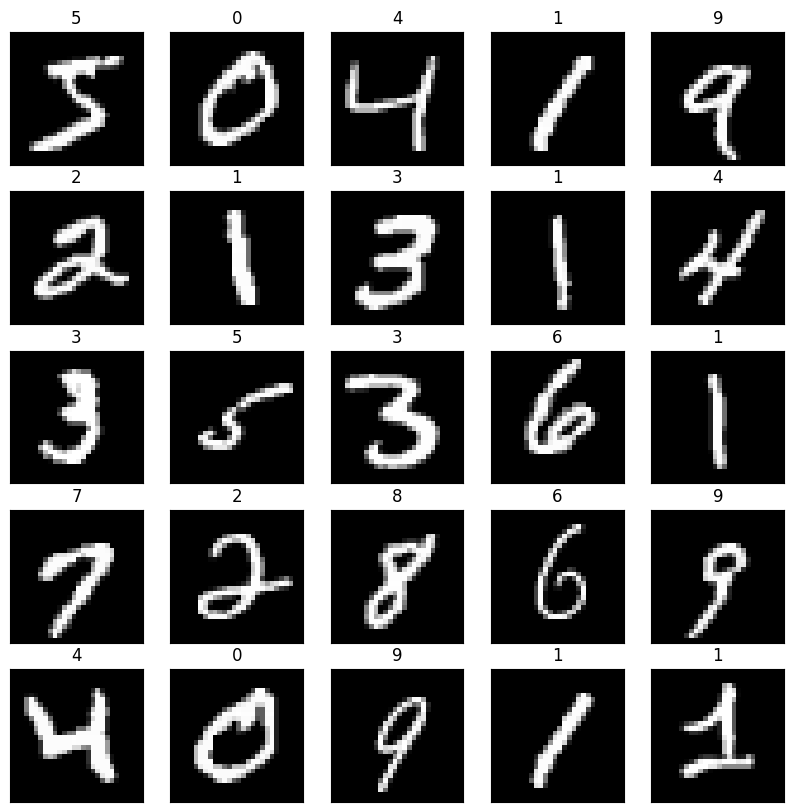

In [4]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(y_train[i])
plt.show()


In [7]:
from tensorflow.keras import Input

# Modify your Sequential model
model = models.Sequential()

# Add an Input layer to define the input shape
model.add(Input(shape=(28, 28, 1)))

# Add the rest of your CNN layers
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Flatten and add dense layers
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


In [8]:
# Reshape the training and test data to add the channel dimension (for grayscale images)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)


In [9]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [10]:
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 17ms/step - accuracy: 0.8941 - loss: 0.3357 - val_accuracy: 0.9834 - val_loss: 0.0503
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.9840 - loss: 0.0488 - val_accuracy: 0.9876 - val_loss: 0.0400
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 17ms/step - accuracy: 0.9894 - loss: 0.0337 - val_accuracy: 0.9892 - val_loss: 0.0335
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.9920 - loss: 0.0243 - val_accuracy: 0.9899 - val_loss: 0.0346
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.9935 - loss: 0.0191 - val_accuracy: 0.9915 - val_loss: 0.0262


In [11]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy:", test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9877 - loss: 0.0346
Test accuracy: 0.9915000200271606


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
Predicted label: 7


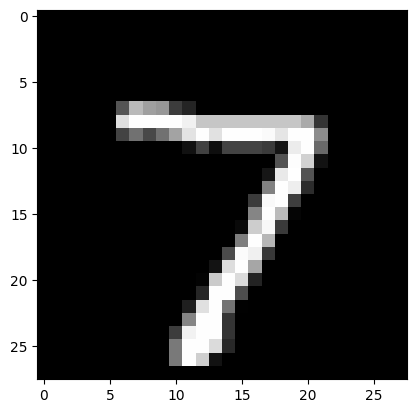

In [12]:
predictions = model.predict(x_test)

# Display the first test image and the predicted digit
plt.imshow(x_test[0], cmap='gray')
print("Predicted label:", np.argmax(predictions[0]))


GRAPH

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 18ms/step - accuracy: 0.9957 - loss: 0.0144 - val_accuracy: 0.9872 - val_loss: 0.0440
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.9960 - loss: 0.0118 - val_accuracy: 0.9879 - val_loss: 0.0439
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 17ms/step - accuracy: 0.9965 - loss: 0.0112 - val_accuracy: 0.9906 - val_loss: 0.0336
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - accuracy: 0.9974 - loss: 0.0083 - val_accuracy: 0.9914 - val_loss: 0.0305
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.9970 - loss: 0.0086 - val_accuracy: 0.9918 - val_loss: 0.0345


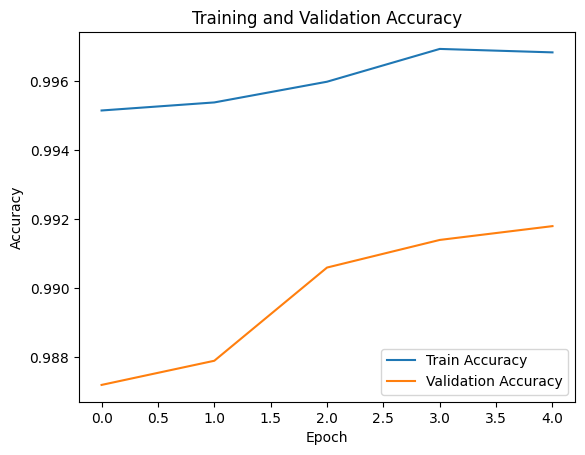

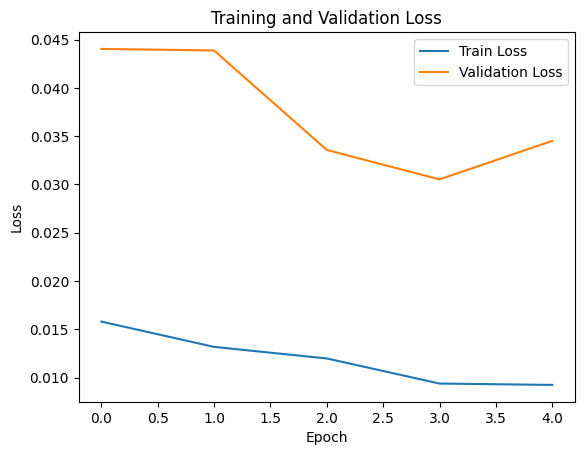

In [13]:
import matplotlib.pyplot as plt

# Train the model and save the training history
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()


Table

In [14]:
import pandas as pd
import numpy as np

# Predict on the test set
predictions = model.predict(x_test)

# Get the predicted labels (take the index of the maximum value as the predicted label)
predicted_labels = np.argmax(predictions, axis=1)

# Create a dataframe to compare actual and predicted labels
comparison_df = pd.DataFrame({
    'Actual Label': y_test[:10],       # Show first 10 samples
    'Predicted Label': predicted_labels[:10]
})

# Display the comparison table
print(comparison_df)


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
   Actual Label  Predicted Label
0             7                7
1             2                2
2             1                1
3             0                0
4             4                4
5             1                1
6             4                4
7             9                9
8             5                5
9             9                9
